In [523]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Preliminary code:

In [524]:
df = pd.read_csv("/content/data.csv")
df.rename(columns=lambda x: x[0].lower() + x.strip().lower().replace(' ', '_')[1:], inplace=True)
df = df.convert_dtypes()
df

,2025_rank,2024_rank,institution_name,location,location_full,size,academic_reputation,employer_reputation,faculty_student,citations_per_faculty,international_faculty,international_students,international_research_network,employment_outcomes,sustainability,qs_overall_score
0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,100
1,2,6,Imperial College London,UK,United Kingdom,L,98.5,99.5,98.2,93.9,100.0,99.6,97.4,93.4,99.7,98.5
2,3,3,University of Oxford,UK,United Kingdom,L,100.0,100.0,100.0,84.8,98.1,97.7,100.0,100.0,85.0,96.9
3,4,4,Harvard University,US,United States,L,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4,96.8
4,5,2,University of Cambridge,UK,United Kingdom,L,100.0,100.0,100.0,84.6,100.0,94.8,99.3,100.0,84.8,96.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,1401+,1201-1400,University of Montana Missoula,US,United States,M,3.0,2.2,10.6,6.1,1.3,1.9,6.5,3.1,1.0,-
1499,1401+,1401+,University of Oradea,RO,Romania,L,5.6,2.2,4.0,1.9,1.5,5.2,34.5,6.2,2.3,-
1500,1401+,1201-1400,University of San Carlos,PH,Philippines,M,7.2,9.4,3.3,1.8,2.1,2.1,6.4,9.6,1.0,-
1501,1401+,1401+,"University Politehnica of Timisoara, UPT",RO,Romania,L,4.1,4.2,7.2,3.9,1.4,2.5,18.6,3.9,1.1,-


In [525]:
df['location_full'].nunique()

106

In [526]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   2025_rank                       1503 non-null   string 
 1   2024_rank                       1482 non-null   string 
 2   institution_name                1503 non-null   string 
 3   location                        1503 non-null   string 
 4   location_full                   1503 non-null   string 
 5   size                            1503 non-null   string 
 6   academic_reputation             1503 non-null   Float64
 7   employer_reputation             1503 non-null   Float64
 8   faculty_student                 1503 non-null   Float64
 9   citations_per_faculty           1503 non-null   Float64
 10  international_faculty           1403 non-null   Float64
 11  international_students          1445 non-null   Float64
 12  international_research_network  15

In [527]:
df.loc[df['qs_overall_score']=='-', 'qs_overall_score'] = '0.0'
df['qs_overall_score'] = df['qs_overall_score'].astype(float)

In [528]:
scores = df[['academic_reputation',
    'employer_reputation',
    'faculty_student',
    'citations_per_faculty',
    'international_faculty',
    'international_students',
    'international_research_network',
    'employment_outcomes',
    'sustainability']]

In [529]:
df_acad_sort=df.sort_values(by=['academic_reputation'], ascending=False)
df_acarep=df_acad_sort.loc[(df_acad_sort['academic_reputation'] >= 80) & (df_acad_sort['academic_reputation'] <=100)]
df_acarep

,2025_rank,2024_rank,institution_name,location,location_full,size,academic_reputation,employer_reputation,faculty_student,citations_per_faculty,international_faculty,international_students,international_research_network,employment_outcomes,sustainability,qs_overall_score
0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,100.0
5,6,5,Stanford University,US,United States,L,100.0,100.0,100.0,99.0,70.3,60.8,96.8,100.0,81.2,96.1
32,32,28,The University of Tokyo,JP,Japan,L,100.0,99.8,89.3,57.3,10.1,29.7,87.4,99.9,98.3,82.1
41,42,29,"University of California, Los Angeles (UCLA)",US,United States,XL,100.0,99.8,35.4,74.0,42.2,22.3,95.5,94.7,67.1,79.8
11,12,10,"University of California, Berkeley (UCB)",US,United States,XL,100.0,100.0,23.5,98.2,91.5,61.0,97.2,98.4,100.0,90.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,56,76,Yonsei University,KR,South Korea,L,81.5,97.0,84.2,44.1,20.7,51.2,78.7,87.8,88.9,72.9
46,47,60,The Hong Kong University of Science and Techno...,HK,Hong Kong SAR,M,81.1,50.3,56.7,99.7,100.0,95.4,46.7,65.4,77.6,77.1
132,133,154,Alma Mater Studiorum - University of Bologna,IT,Italy,XL,80.8,47.8,3.7,46.6,14.5,12.3,96.0,53.8,88.4,54.1
131,132,134,Sapienza University of Rome,IT,Italy,XL,80.7,48.5,5.0,45.3,3.1,8.0,97.1,88.0,72.3,54.2


In [530]:
df['is_us'] = df['location_full'] == 'United States'
df['us_location'] = df['location_full'].where(df['is_us'], other=None)
df['location_full'] = df['location_full'].where(~df['is_us'], other=df['location_full'])
df['int_location'] = df['location_full'].where(~df['is_us'], other=None)

In [531]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   2025_rank                       1503 non-null   string 
 1   2024_rank                       1482 non-null   string 
 2   institution_name                1503 non-null   string 
 3   location                        1503 non-null   string 
 4   location_full                   1503 non-null   string 
 5   size                            1503 non-null   string 
 6   academic_reputation             1503 non-null   Float64
 7   employer_reputation             1503 non-null   Float64
 8   faculty_student                 1503 non-null   Float64
 9   citations_per_faculty           1503 non-null   Float64
 10  international_faculty           1403 non-null   Float64
 11  international_students          1445 non-null   Float64
 12  international_research_network  15

In [532]:
float_columns = ['academic_reputation', 'employer_reputation', 'faculty_student', 'citations_per_faculty',
                 'international_faculty', 'international_students', 'international_research_network',
                 'employment_outcomes', 'sustainability']

for col in float_columns:
    df[col] = df[col].astype('float64')

In [533]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   2025_rank                       1503 non-null   string 
 1   2024_rank                       1482 non-null   string 
 2   institution_name                1503 non-null   string 
 3   location                        1503 non-null   string 
 4   location_full                   1503 non-null   string 
 5   size                            1503 non-null   string 
 6   academic_reputation             1503 non-null   float64
 7   employer_reputation             1503 non-null   float64
 8   faculty_student                 1503 non-null   float64
 9   citations_per_faculty           1503 non-null   float64
 10  international_faculty           1403 non-null   float64
 11  international_students          1445 non-null   float64
 12  international_research_network  15

In [534]:
uni_df = df['institution_name'].value_counts()

# **Exploring Data:**

# Distribution of Universities Across Countries

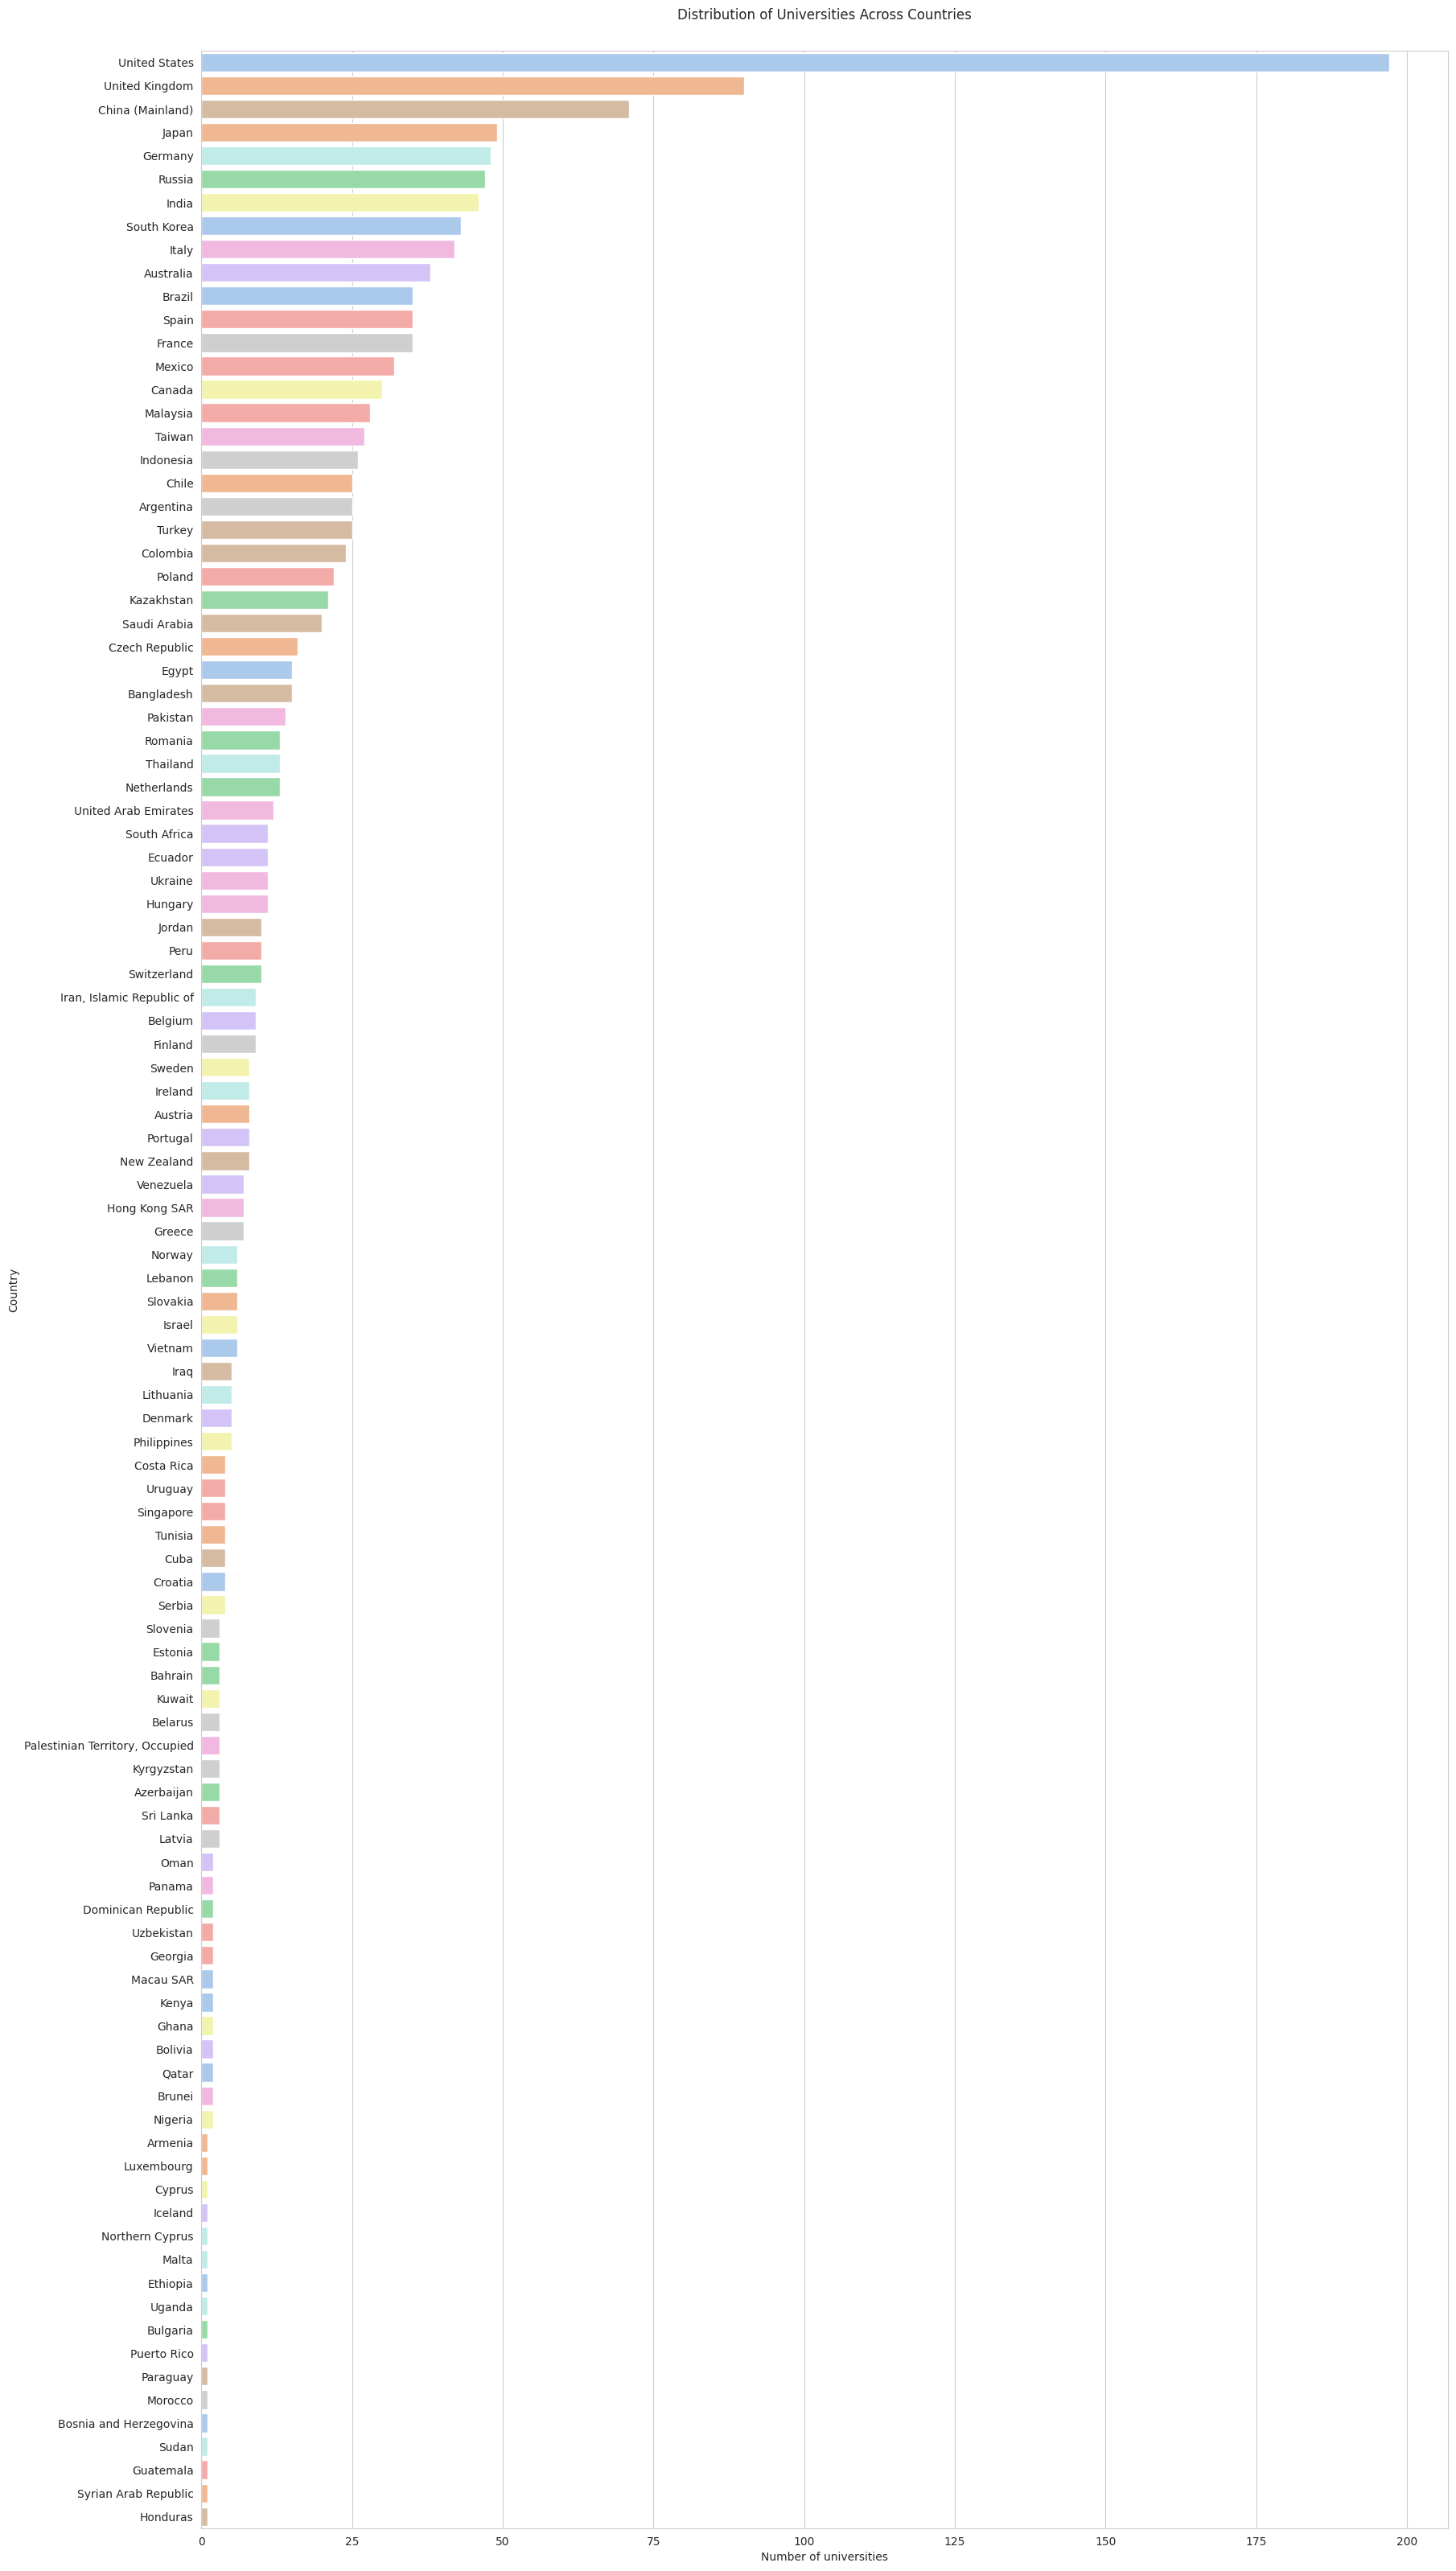

In [535]:
fig, ax = plt.subplots(figsize=(20, 40))
sns.countplot(data=df, y='location_full', order=df.location_full.value_counts().index, palette="pastel", hue="location_full")
plt.xlabel('Number of universities')
plt.ylabel('Country')
plt.title("Distribution of Universities Across Countries", y=1.01)
plt.show()

# Top 10 Universities by QS Overall Score

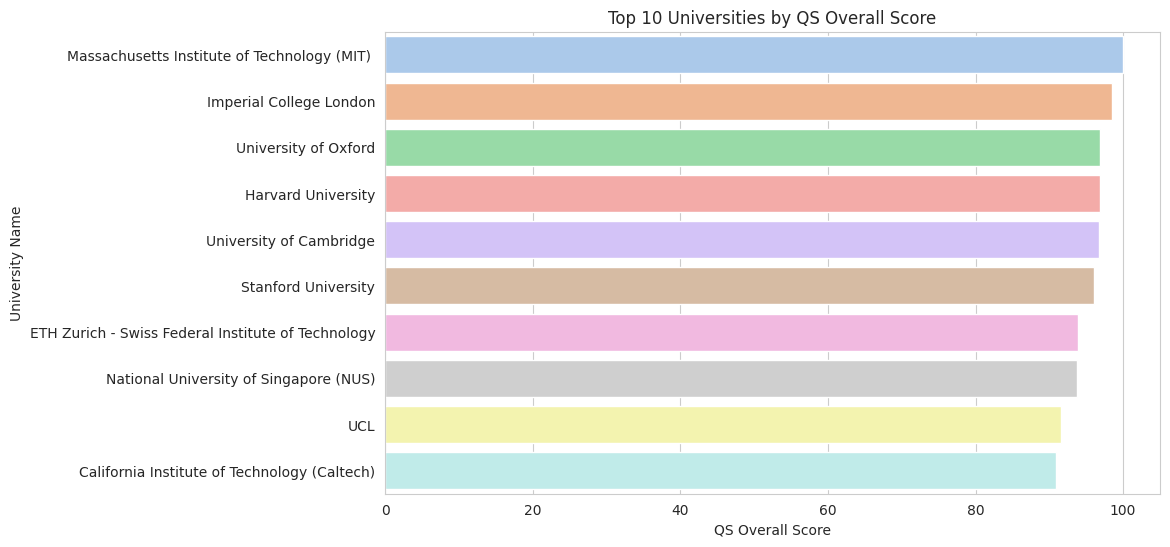

In [536]:
top_10 = df.nlargest(10, 'qs_overall_score')

plt.figure(figsize=(10, 6))
sns.barplot(x='qs_overall_score', y='institution_name', data=top_10, palette='pastel', hue='institution_name')
plt.title('Top 10 Universities by QS Overall Score')
plt.xlabel('QS Overall Score')
plt.ylabel('University Name')
plt.show()

# Prospective Student Goals:
For this student, the primary goal is to determine which type of school will give them the best chance of finding a job after they complete their degree. I will explore categories of schools and individual schools that not only score high in these categories, but have high scores in correlating factors. Additionally, I will explore other factors that are of importance to this student, such as sustainability and opportunities to work with international faculty. Though they may not necessarily go to school in the US, they would like to make connections to faculty members from around the world to enhance international job prospects. I will also consider schools that have a high concentration of international students, as it would be wise to make connections. Lastly, in terms of lifestyle, sustainability is a priority to the student, and thus I will consider this as a factor in the decision.

# Correlation Matrix of Scored Factors

Below is a correlation matrix between the scored categories.  

Strong Positive Correlations: According to the map, Academic Reputation and Employer Reputation are strongly correlated with each other.  QS Overall Score has strong positive correlations with Academic Reputation, Employer Reputation, and Employment Outcomes. Possibly unsurprisingly, there is a strong positive correlation between International Students and International Faculty.

Moderately Positive Correlations: Citations per Faculty member has moderately positive correlations with Academic Reputation, International Research Network, and QS Overall Score. Sustainability shows a moderately positive correlation to Academic Reputation, International Research Network, and QS Overall Score.

Weak Correlation: Overall, Faculty Student Ratio shows a weaker positive correlation across the board to other factors than the other categories.

As a result of this analysis, I will focus on the factors that most strongly correlate with Employment Outcomes: Academic Reputation and Employer Reputation. Secondarily, I will explore international faculty and sustainability, as these are both priorities for the prospective student. Lastly, I will explore sustainability and its correlation to the international research network.

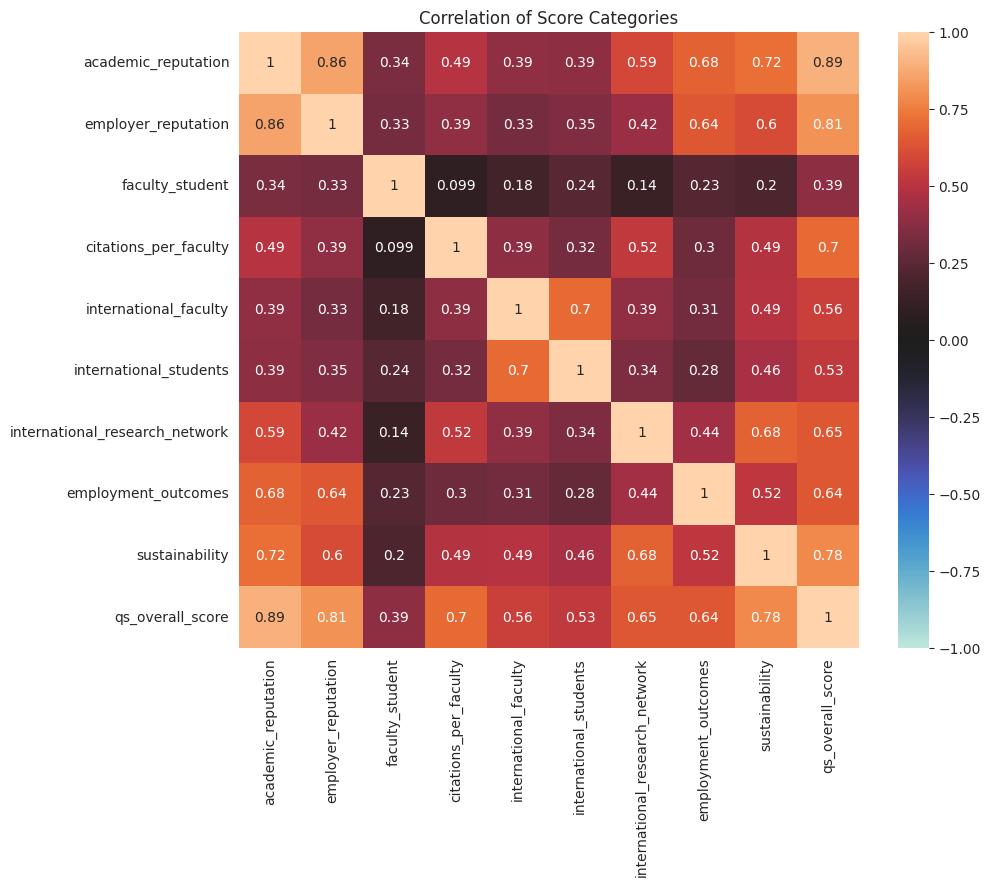

In [537]:
score_columns = df.select_dtypes(include=['float64']).columns
correlation_matrix = df[score_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, center=0)
plt.title('Correlation of Score Categories')
plt.show()

# Correlation to Employment Outcomes in US and International Schools

In the following plots, I explore the correlation between employment outcomes and two strongly correlated factors, academic reputation and employer reputation. In this, I observe that the strongest positive correlation is in the U.S. schools when correlated with the two factors. However, international schools do show a positive correlation, and it seems that the concentration of lower scoring schools in both of these categories is affecting the relationship to employment outcome.

In [538]:
df['academic_reputation'] = pd.to_numeric(df['academic_reputation'], errors='coerce')
df['employer_reputation'] = pd.to_numeric(df['employer_reputation'], errors='coerce')

df_clean = df.dropna(subset=['academic_reputation', 'employer_reputation'])

US_schools = df_clean['location'] == 'US'

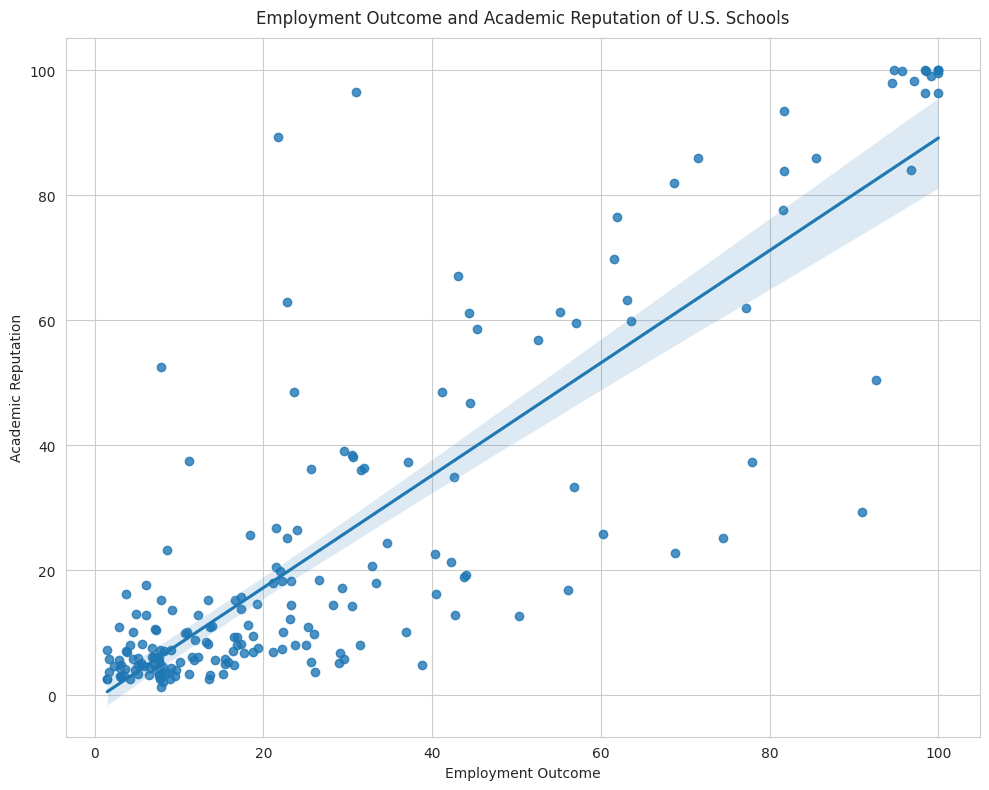

In [539]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.regplot(x='employment_outcomes', y='academic_reputation', data=df_clean[US_schools])
plt.title('Employment Outcome and Academic Reputation of U.S. Schools', y=1.01)
plt.xlabel('Employment Outcome')
plt.ylabel('Academic Reputation')
plt.tight_layout()
plt.show()

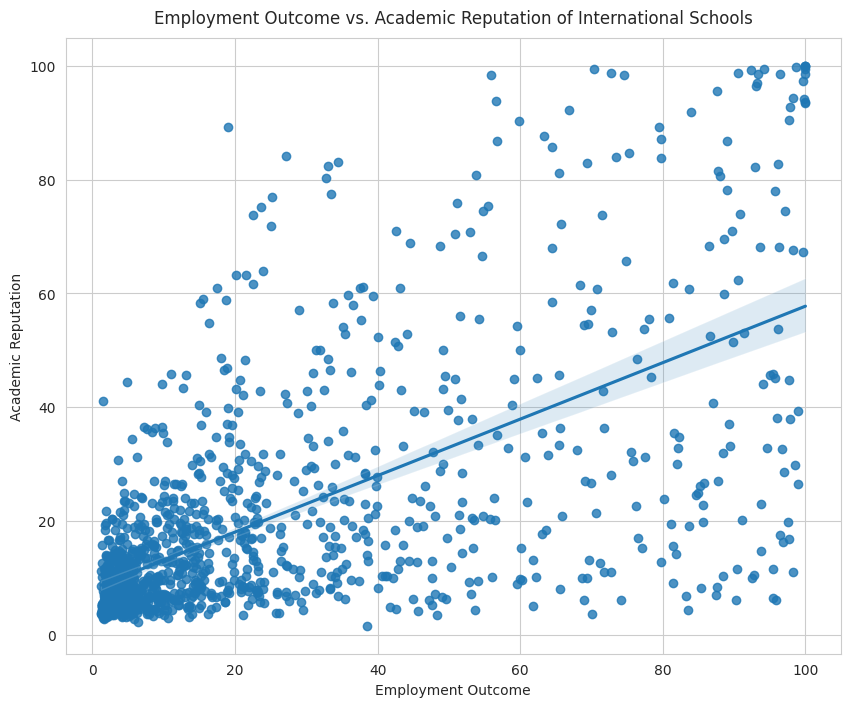

In [540]:
int_schools=df_clean['location']!='US'
fig, ax = plt.subplots(figsize=(10, 8))
sns.regplot(x='employment_outcomes', y='academic_reputation', data=df_clean[int_schools])
plt.title('Employment Outcome vs. Academic Reputation of International Schools', y=1.01)
plt.xlabel('Employment Outcome')
plt.ylabel('Academic Reputation')
plt.show()

The same can be said for employment outcomes in the US and internationally, as seen below.

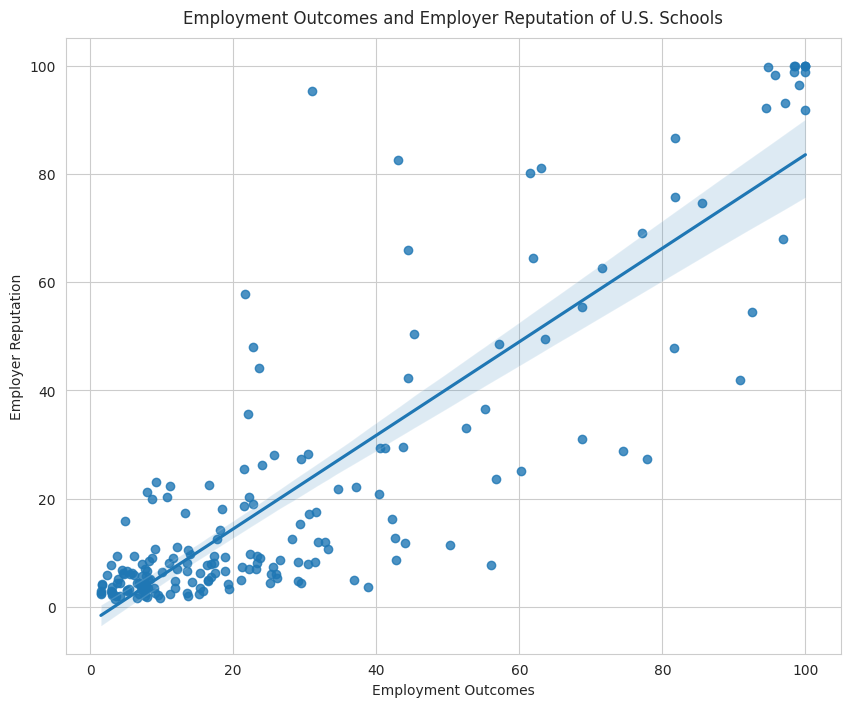

In [541]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.regplot(x='employment_outcomes', y='employer_reputation', data=df_clean[US_schools])
plt.title('Employment Outcomes and Employer Reputation of U.S. Schools', y=1.01)
plt.xlabel('Employment Outcomes')
plt.ylabel('Employer Reputation')
plt.show()

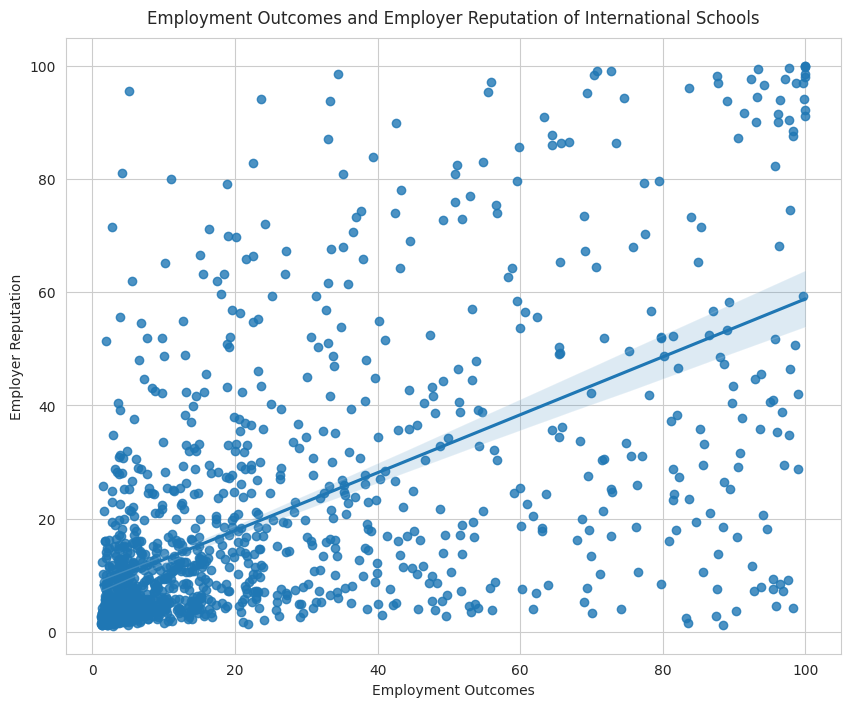

In [542]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.regplot(x='employment_outcomes', y='employer_reputation', data=df[int_schools])
plt.title('Employment Outcomes and Employer Reputation of International Schools', y=1.01)
plt.xlabel('Employment Outcomes')
plt.ylabel('Employer Reputation')
plt.show()

# Academic Reputation in the US vs. Internationally

The following two histograms show the distribution of academic reputation scores amongst schools in the US versus international schools. While the US schools have a high concentration in the lower scores, trends downward in the middle range, then rises again at the end of the scale, which reflects a concentration of high academic reputation scores amongst US institutions. This is unsurprising when looking at the rankings, as 7 out of the top 20 ranked institutions for 2025 are from the US alone.  The international schools trend downward more consistently as the reputation score increases, which suggests that while there are several high scoring schools, they are less concentrated in the highest scoring range.


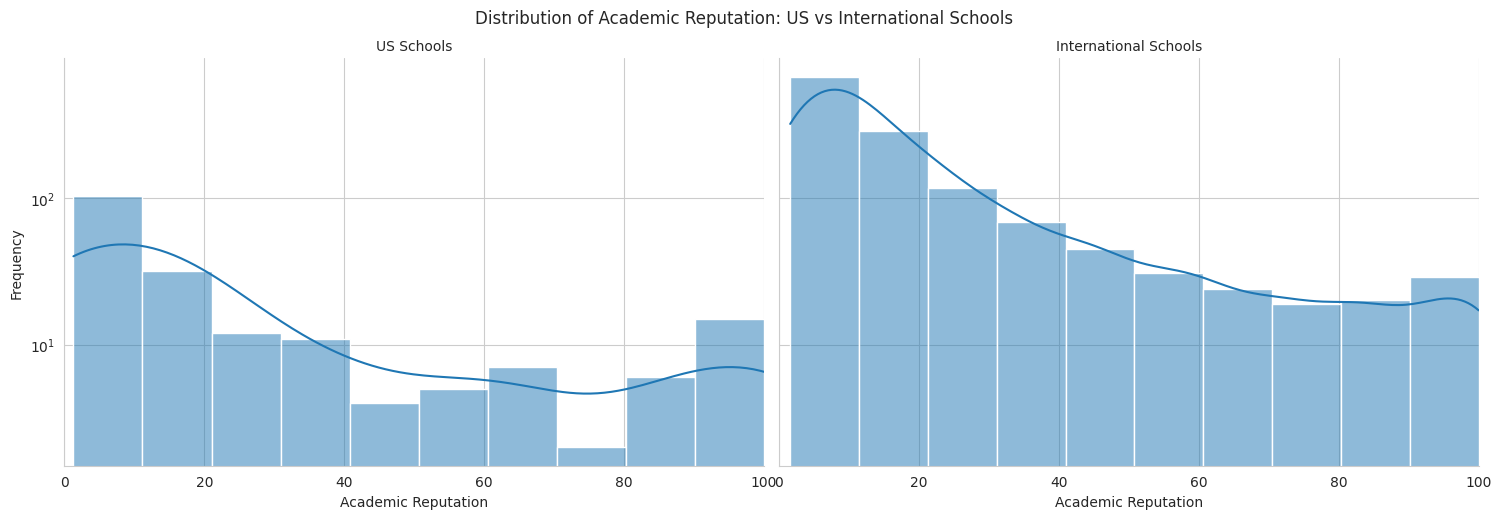

In [543]:
df['school_location'] = df['location'].apply(lambda x: 'US' if x == 'US' else 'International')

sns.set_style('whitegrid')
g = sns.FacetGrid(df, col='school_location', height=5, aspect=1.5)
g.map(sns.histplot, 'academic_reputation', kde=True, bins=10)

g.set_axis_labels('Academic Reputation', 'Frequency')
g.set_titles('{col_name} Schools')
g.fig.suptitle('Distribution of Academic Reputation: US vs International Schools', y=1.03)

g.set(xlim=(0, 100))

for ax in g.axes.flat:
    ax.set_yscale('log')

plt.show()

# Correlation between school size and other factors

The following box plots explore which school sizes are more likely to have higher scores in sustainability, academic reputation, employer reputation, employment outcome, and international faculty.

According to the box plots, as school size increases, the higher the sustainability score trends. The small and medium school median scores are very close, though the IQR ranges differ. Large and Extra large schools perform very well in this area, though extra large schools perform the best.

Unlike sustainability, it appears that the smallest school size has a slightly higher median academic reputation than the medium sized, though the medium size has many outliers. Next highest scores are large, then extra large. Employer reputation appears to reflect this same pattern. In fact, the median employer reputation score is fairly close between the small and large schools. The medium scores are the lowest overall, and the XL schools are the highest.

Employment outcomes increase as the school size increases. Extra large schools seem to perform particularly well.

Interestingly, small schools display a different pattern. Smaller schools are highly likely to have international faculty, with a distant second being large schools.

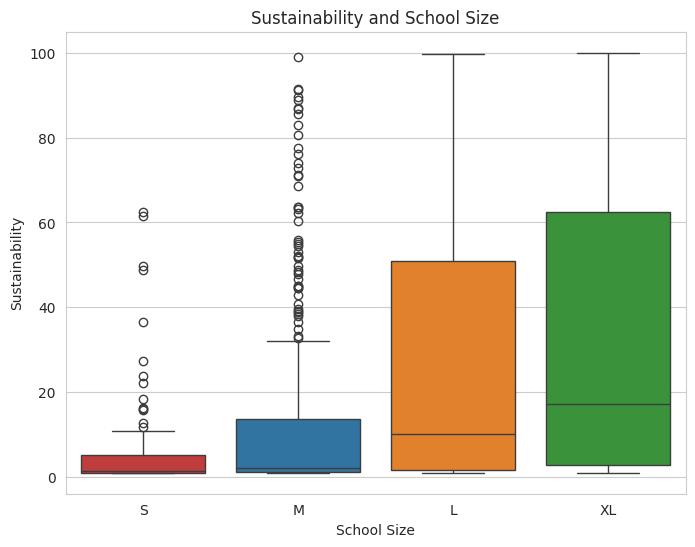

In [544]:
size_order = ["S", "M", "L", "XL"]
plt.figure(figsize=(8, 6))
sns.boxplot(x='size', y='sustainability', data=df, order=size_order, hue='size')
plt.title('Sustainability and School Size')
plt.xlabel('School Size')
plt.ylabel('Sustainability')
plt.show()

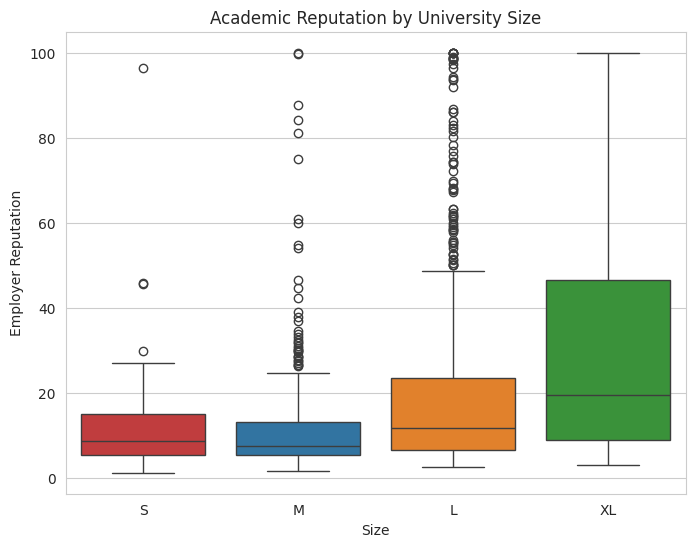

In [545]:
size_order = ["S", "M", "L", "XL"]
plt.figure(figsize=(8, 6))
sns.boxplot(x='size', y='academic_reputation', data=df, order=size_order, hue='size')
plt.title('Academic Reputation by University Size')
plt.xlabel('Size')
plt.ylabel('Employer Reputation')
plt.show()

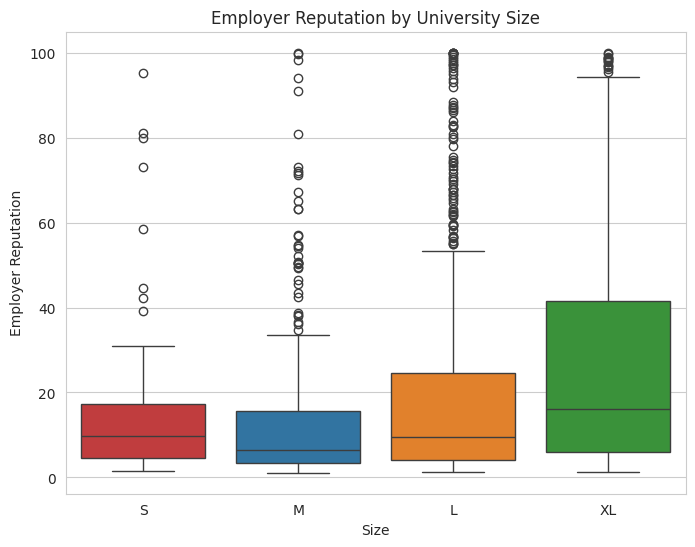

In [546]:
size_order = ["S", "M", "L", "XL"]
plt.figure(figsize=(8, 6))
sns.boxplot(x='size', y='employer_reputation', data=df, order=size_order, hue='size')
plt.title('Employer Reputation by University Size')
plt.xlabel('Size')
plt.ylabel('Employer Reputation')
plt.show()

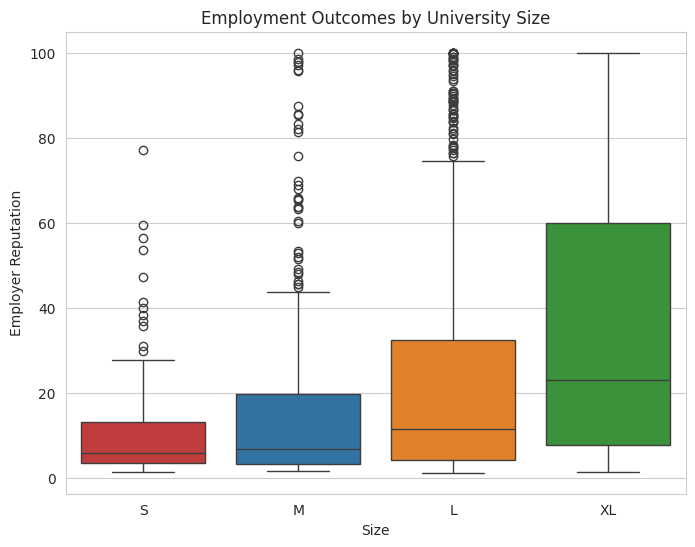

In [547]:
size_order = ["S", "M", "L", "XL"]
plt.figure(figsize=(8, 6))
sns.boxplot(x='size', y='employment_outcomes', data=df, order=size_order, hue='size')
plt.title('Employment Outcomes by University Size')
plt.xlabel('Size')
plt.ylabel('Employer Reputation')
plt.show()

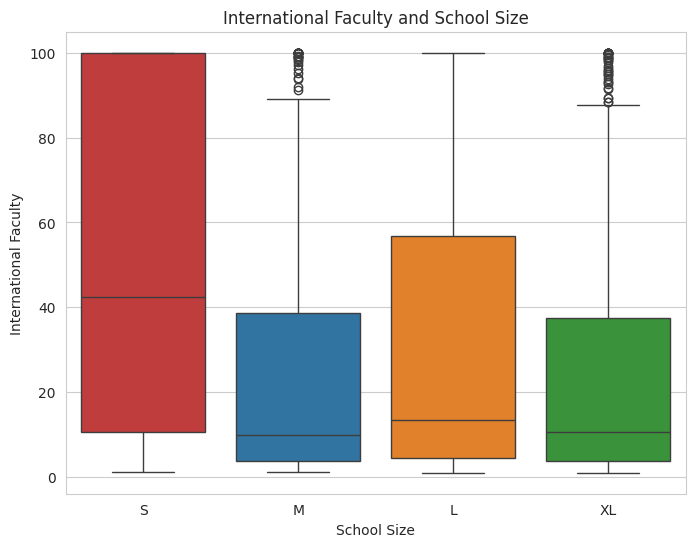

In [548]:
size_order = ["S", "M", "L", "XL"]
plt.figure(figsize=(8, 6))
sns.boxplot(x='size', y='international_faculty', data=df, order=size_order, hue='size')
plt.title('International Faculty and School Size')
plt.xlabel('School Size')
plt.ylabel('International Faculty')
plt.show()

Despite there being evidence that certain school sizes are more strongly correlated to certain factors than others, the correlation map below demonstrates that, overall, size might not be a top priority consideration.

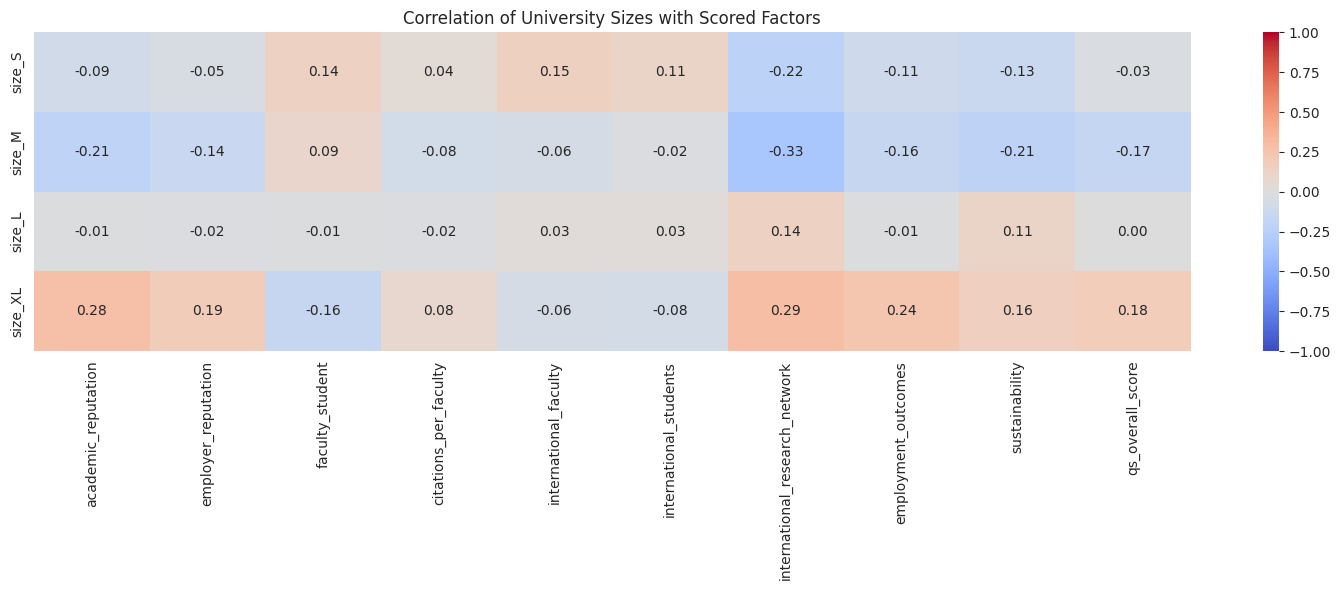

In [549]:
df = pd.get_dummies(df, columns=['size'])
score_columns = df.select_dtypes(include=['float64']).columns
correlations = df[['size_S', 'size_M', 'size_L', 'size_XL'] + list(score_columns)].corr().iloc[:4, 4:]
plt.figure(figsize=(15, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title('Correlation of University Sizes with Scored Factors')
plt.tight_layout()
plt.show()

# **Top 10 Schools based on Scored Factors**

In this section, I will identify top scoring schools in each of the categories of importance: International Faculty, Employment Outcomes, Employer Reputation, Academic Reputation, and Sustainability. Then, I created a new combined score that considers each of these five factors equally.

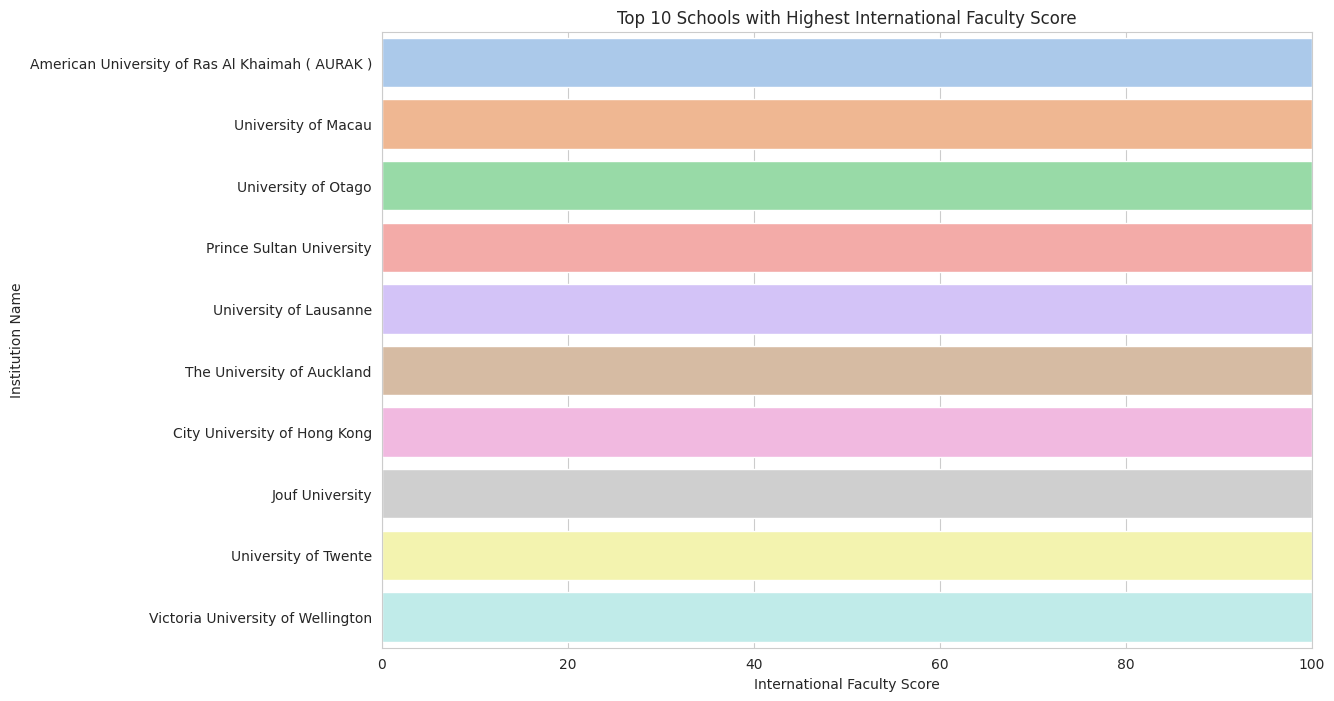

In [550]:
top_int_faculty_schools = df.sort_values(by='international_faculty', ascending=False)

top_10_schools = top_int_faculty_schools[['institution_name', 'international_faculty']].head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='international_faculty', y='institution_name', data=top_10_schools, palette='pastel', hue='institution_name')
plt.title('Top 10 Schools with Highest International Faculty Score')
plt.xlabel('International Faculty Score')
plt.ylabel('Institution Name')
plt.xlim(0, 100)
plt.show()

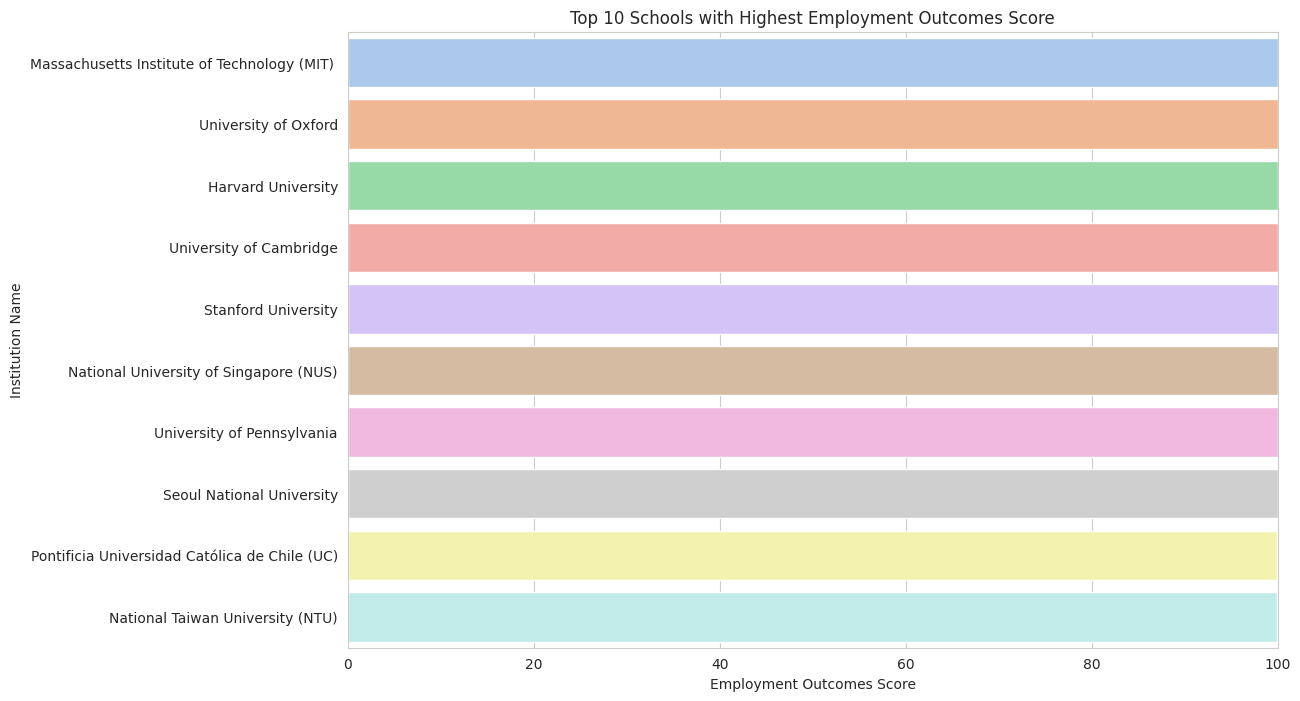

In [551]:
top_emp_outc_schools = df.sort_values(by='employment_outcomes', ascending=False)

top_10_schools = top_emp_outc_schools[['institution_name', 'employment_outcomes']].head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='employment_outcomes', y='institution_name', data=top_10_schools, palette='pastel', hue='institution_name')
plt.title('Top 10 Schools with Highest Employment Outcomes Score')
plt.xlabel('Employment Outcomes Score')
plt.ylabel('Institution Name')
plt.xlim(0, 100)
plt.show()

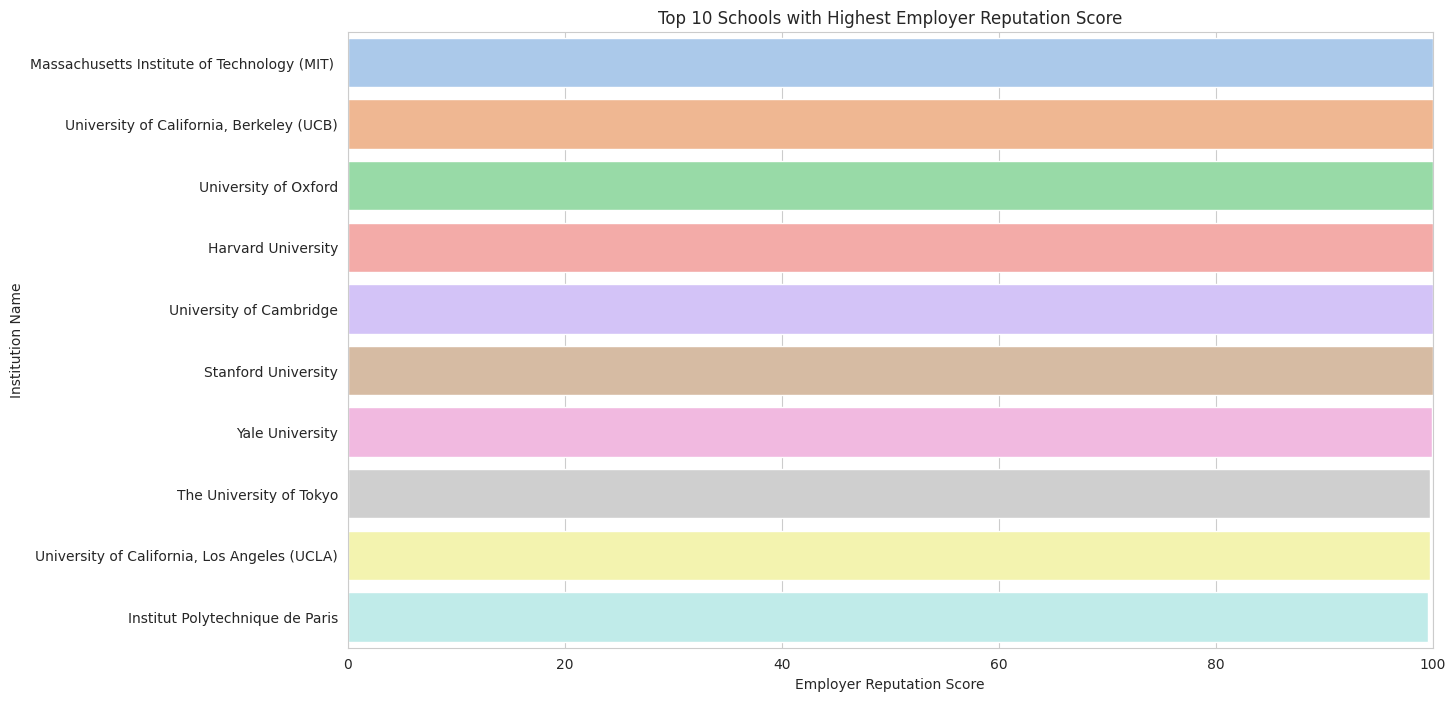

In [552]:
top_emp_rep_schools = df.sort_values(by='employer_reputation', ascending=False)

top_10_schools = top_emp_rep_schools[['institution_name', 'employer_reputation']].head(10)

plt.figure(figsize=(14, 8))
sns.barplot(x='employer_reputation', y='institution_name', data=top_10_schools, palette='pastel', hue='institution_name')
plt.title('Top 10 Schools with Highest Employer Reputation Score')
plt.xlabel('Employer Reputation Score')
plt.ylabel('Institution Name')
plt.xlim(0, 100)
plt.show()

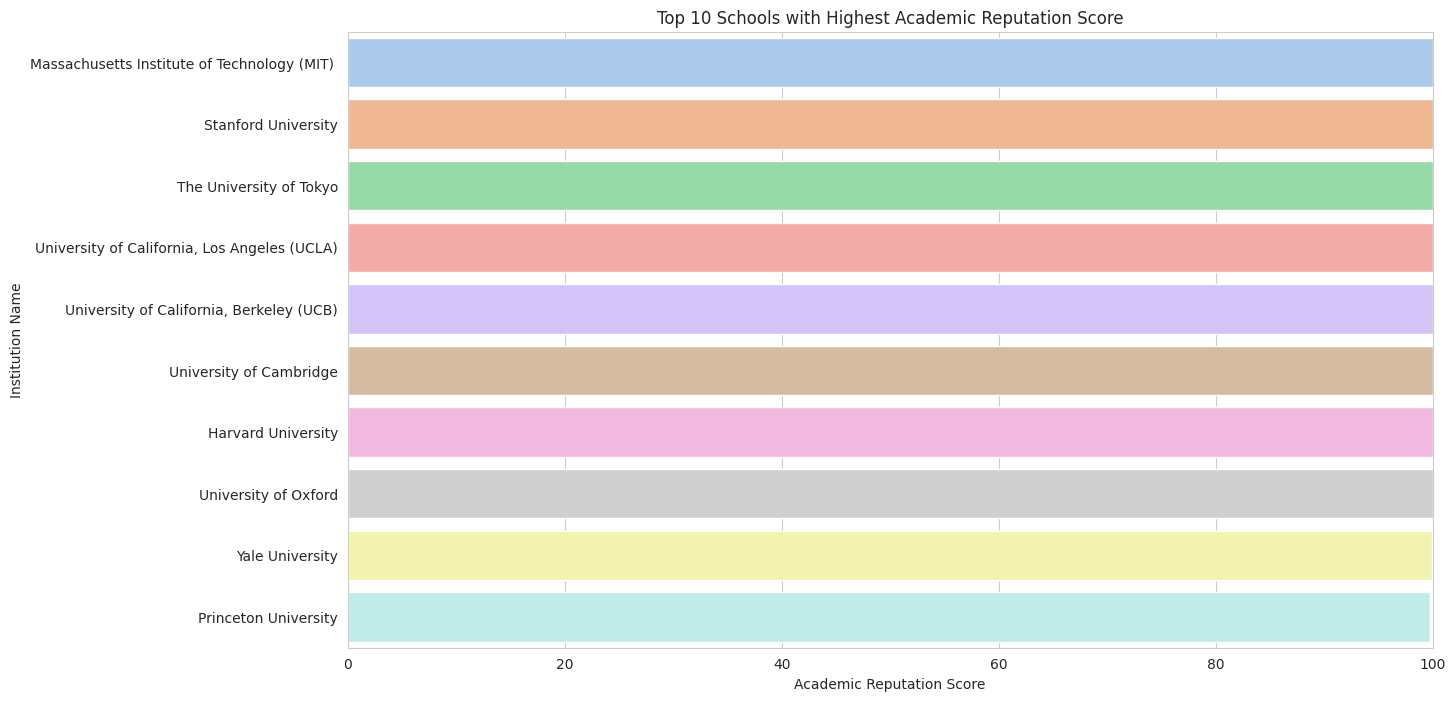

In [553]:
top_aca_rep_schools = df.sort_values(by='academic_reputation', ascending=False)

top_10_schools = top_aca_rep_schools[['institution_name', 'academic_reputation']].head(10)

plt.figure(figsize=(14, 8))
sns.barplot(x='academic_reputation', y='institution_name', data=top_10_schools, palette='pastel', hue='institution_name')
plt.title('Top 10 Schools with Highest Academic Reputation Score')
plt.xlabel('Academic Reputation Score')
plt.ylabel('Institution Name')
plt.xlim(0, 100)
plt.show()

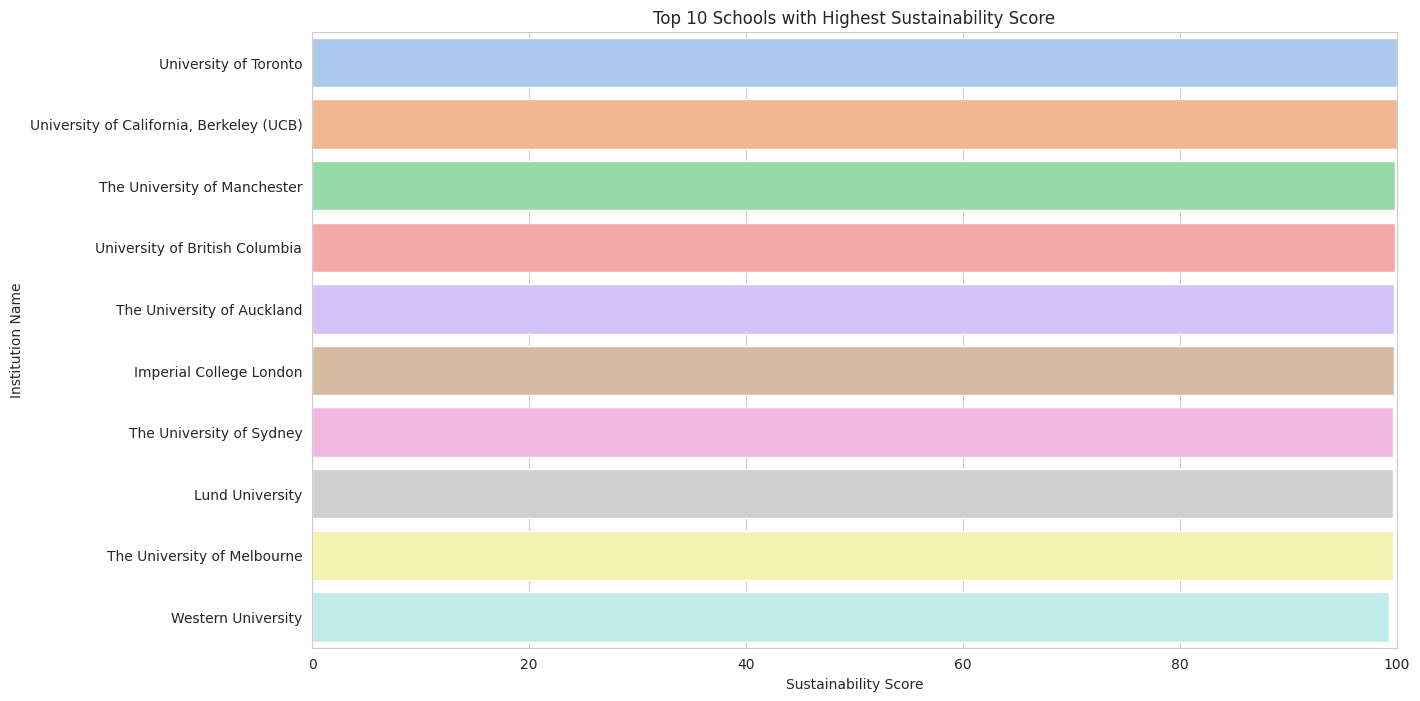

In [554]:
top_sust_schools = df.sort_values(by='sustainability', ascending=False)

top_10_schools = top_sust_schools[['institution_name', 'sustainability']].head(10)

plt.figure(figsize=(14, 8))
sns.barplot(x='sustainability', y='institution_name', data=top_10_schools, palette='pastel', hue='institution_name')
plt.title('Top 10 Schools with Highest Sustainability Score')
plt.xlabel('Sustainability Score')
plt.ylabel('Institution Name')
plt.xlim(0, 100)
plt.show()

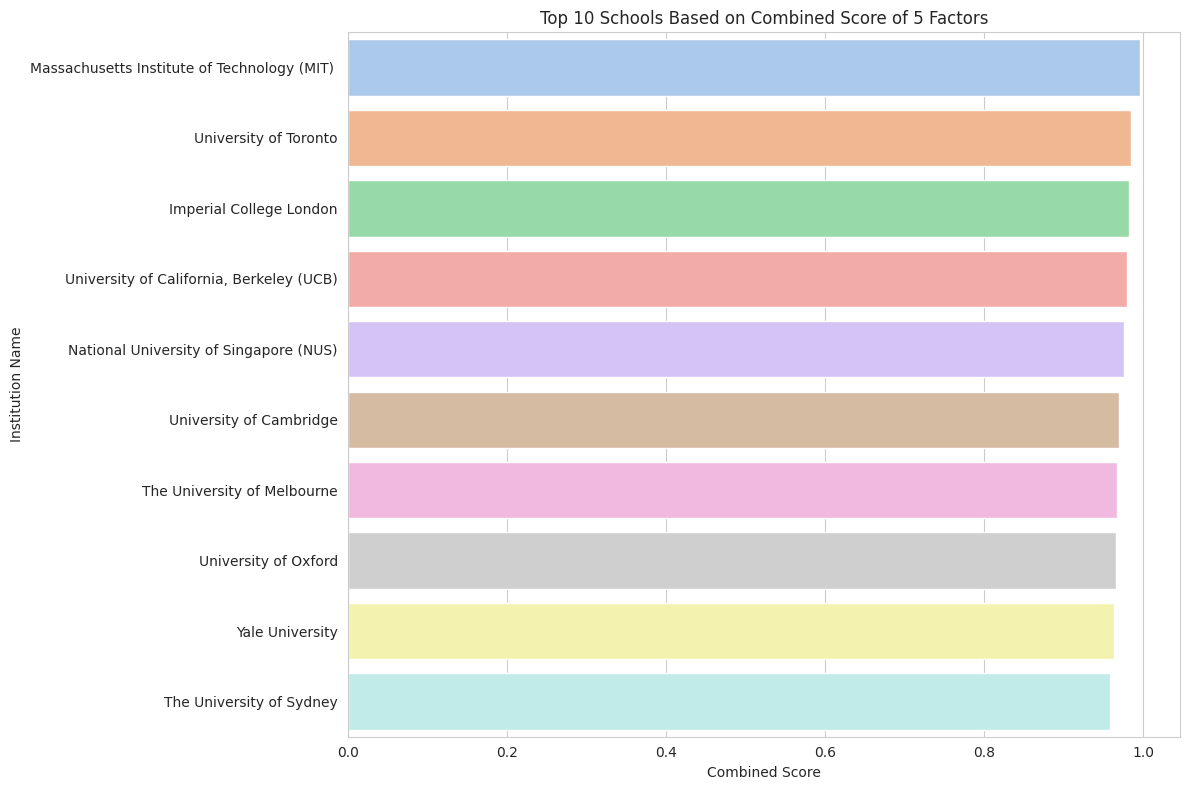

In [555]:
scored_factors = ['international_faculty', 'employment_outcomes', 'employer_reputation', 'academic_reputation', 'sustainability']

for factor in scored_factors:
    df[f'{factor}_norm'] = df[factor] / df[factor].max()

df['combined_score'] = df[[f'{factor}_norm' for factor in factors]].mean(axis=1)

top_schools = df.nlargest(10, 'combined_score')

plt.figure(figsize=(12, 8))
sns.barplot(x='combined_score', y='institution_name', data=top_schools, palette='pastel', hue='institution_name')
plt.title('Top 10 Schools Based on Combined Score of 5 Factors')
plt.xlabel('Combined Score')
plt.ylabel('Institution Name')
plt.tight_layout()
plt.show()

# Conclusion

Based on the combination of scored factors, the schools in the above visualization would best suit the prospective student. However, earlier explored factors give more general guidelines on what the prospective student should consider and should not be disregarded.